# Introduction to Sci-kit learn 

This notebook demonstrates some of the most useful functions of the beautiful Scikit-learn library.

What we're going to cover:

0. An end-to-end Scikit Learn Workflow
1. Getting the data ready
2. Choose the right estimator/algorithms for our own problems 
3. Fit the model/algorithm and use it to make predicitons on our data 
4. Evaluating a model
5. Improve a model
6. Save and load a trained model
7. Putting it all together!!


# 0. An end-to-end Scikit-Learn Workflowm

In [1]:
#Standard import 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



In [2]:
import warnings 
warnings.filterwarnings("ignore")

In [3]:
# 1. Get the data ready 

import pandas as pd 
heart_disease = pd.read_csv("data/heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
# Create X (feature matrix)
X = heart_disease.drop("target", axis= 1)

# Create Y (labels)
y = heart_disease["target"]

In [5]:
# 1. Choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

# We'll get the hyperparameters
clf.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model into training model 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [7]:
clf.fit(X_train, y_train);

In [8]:
# make a prediciton

# y_label = clf.predict(np.array([0, 2, 3, 4]))  #to know the error open uncomment the line 

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1], dtype=int64)

In [10]:
y_test

82     1
195    0
97     1
50     1
6      1
      ..
216    0
159    1
294    0
118    1
109    1
Name: target, Length: 61, dtype: int64

In [11]:
# 4. Evaluating the model on the training data and test data 
clf.score(X_train, y_train)


1.0

In [12]:
clf.score(X_test, y_test)

0.819672131147541

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.89      0.82      0.85        38

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.81        61
weighted avg       0.83      0.82      0.82        61



In [14]:
print(confusion_matrix(y_test, y_preds))

[[19  4]
 [ 7 31]]


In [15]:
print(accuracy_score(y_test, y_preds))

0.819672131147541


In [16]:
# 5. Improve a model 
# Try different amount of n_estimators

np.random.seed(42)
for i in range (10, 100, 10):
    print(f"Trying models with {i} estimators.......")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100 :.2f}%")
    print("")

Trying models with 10 estimators.......
Model accuracy on test set: 81.97%

Trying models with 20 estimators.......
Model accuracy on test set: 81.97%

Trying models with 30 estimators.......
Model accuracy on test set: 81.97%

Trying models with 40 estimators.......
Model accuracy on test set: 81.97%

Trying models with 50 estimators.......
Model accuracy on test set: 83.61%

Trying models with 60 estimators.......
Model accuracy on test set: 80.33%

Trying models with 70 estimators.......
Model accuracy on test set: 81.97%

Trying models with 80 estimators.......
Model accuracy on test set: 80.33%

Trying models with 90 estimators.......
Model accuracy on test set: 81.97%



In [17]:
# 6. Save a model and load it 

import pickle
 
pickle.dump(clf, open("random_forest_model_1.pk1", "wb")) # wb denotes write binary 

In [18]:
loaded_model = pickle.load(open("random_forest_model_1.pk1", "rb")) # read binary

In [19]:
loaded_model.score(X_test, y_test)

0.819672131147541

# 1. Getting the Data Ready 

`
Three things we have to do :
        1. Split the data into features and labels (usually 'X' and 'y')
        2. Filling (or imputing) and disregarding missing values
        3. Converting non-numerical values into numerical values (also called feature encoding) `

In [20]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_disease.drop('target', axis = 1)

In [22]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [23]:
y = heart_disease["target"]

In [24]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Split the data into training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [26]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure it's all numericalm

In [27]:
car_sales = pd.read_csv("data/car-sales-extended.csv")

In [28]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
len(car_sales)

1000

In [30]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [31]:
car_sales["Doors"].value_counts()

4    856
5     79
3     65
Name: Doors, dtype: int64

In [32]:
# Split the data into X/y

X = car_sales.drop("Price", axis = 1)
y = car_sales["Price"]


In [33]:
# Split into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [34]:
# Convert this into model 

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [35]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [36]:
# to get rid of error - Turning the categories into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [37]:
pd.DataFrame(transformed_X) # The entire non - numerical data is now turned into numbers

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [38]:
# getting the dummies 

dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies  # representation of non - numerical values into dummies 
 

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [39]:
# Let's refit the model 

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X,
                                                    y,
                                                    test_size = 0.2)
model.fit(X_train, y_train)

RandomForestRegressor()

In [40]:
model.score(X_test, y_test)

0.3235867221569877

## 1.2 What if there were missing values

1. Fill them with missing data (aka imputation).
2. Replace the samples with missing data altogether.

In [41]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [42]:
# Create X and y

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [43]:
# Getting the total number of missing data from each column 

car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [44]:
# lets convert our data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [45]:
car_sales_missing.head(20)

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
5,Honda,Red,42652.0,4.0,23883.0
6,Toyota,Blue,163453.0,4.0,8473.0
7,Honda,White,NaN,4.0,20306.0
8,NaN,White,130538.0,4.0,9374.0
9,Honda,Blue,51029.0,4.0,26683.0


In [46]:
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

### Option 1: Fill the missing data with pandas 

In [47]:
# Fill the "Make" column 
car_sales_missing["Make"].fillna("missing", inplace = True)


# Fill the "Colour" column 
car_sales_missing["Colour"].fillna("missing", inplace = True)

# Fill the "Doors" column 
car_sales_missing["Doors"].fillna(4, inplace = True) # since the majority of cars have 4 doors

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(), inplace = True)


In [48]:
# Checking the count of missing values 
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [49]:
# Remove rows with missing price values 
car_sales_missing.dropna(inplace = True)

In [50]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [51]:
len(car_sales_missing)

950

In [52]:
X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]


In [53]:
# lets convert our data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### Option 2 : Fill the missing values with sci-kit learn

In [54]:
car_sales_missing = pd.read_csv("data/car-sales-extended-missing-data.csv")
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [55]:
car_sales_missing 

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [56]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [57]:
# Split into X and y

X = car_sales_missing.drop("Price", axis = 1)
y = car_sales_missing["Price"]

In [58]:
car_sales_missing.dropna(subset = ["Price"], inplace = True)
car_sales_missing.isna().sum()  

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [59]:
X.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
dtype: int64

In [60]:
# Fill missing values with Sci_Kit Learn 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer 

# Fill the categorical values with missing and numerical values with mean 
cat_imputer = SimpleImputer( strategy = "constant", fill_value = "missing")  #for categorical values
door_imputer = SimpleImputer(strategy = "constant", fill_value = 4)
num_imputer = SimpleImputer(strategy = "mean")

# Define Columns 
cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills the  missing values)
imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_features),
    ("num_imputer", num_imputer, num_features)
])

# Transform the Data 
filled_X = imputer.fit_transform(X)
filled_X 

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [61]:
# Checking the rersults 
car_sales_filled = pd.DataFrame(filled_X,
                                columns = ["Make", "Colour","Doors", "Odometer (KM)"])
car_sales_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
995,Toyota,Black,4.0,35820.0
996,missing,White,3.0,155144.0
997,Nissan,Blue,4.0,66604.0
998,Honda,White,4.0,215883.0


In [62]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [63]:
# lets convert our data into numbers

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                  one_hot,
                                  categorical_features)],
                                  remainder = "passthrough")

transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<1000x15 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [64]:
# Now we have got our data as numbers and filled (no missing data)
# Let's fit a model 

# np.random.seed(42)
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(transformed_X,
#                                                     y,
#                                                     test_size=0.2)
# RandomForestRegressor(n_estimators = 100)
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [65]:
# Reason for the worst accuracy by this model 

len(car_sales_filled), len(car_sales)

# Since it has only 950 samples that's why it is performing slightly worse

(1000, 1000)

# 2. Choosing the right estimator / algorithm to the problem 

Some things to note:
    
* Sklearn refers to machine learning models, algorithms and estimator 
* Classfication problem - predicting a category (heart disease or not)
     * Sometimes we'll see `clf` (short for classifier) used as a classification estimator 
*Regression problem - predicting a number (selling price of car)

If working on machine learning problem, not really sure of what model to use, refer machine learning model map: https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

### 2.1 Picking a machine learning model for a regression problem 

Lets use California Housing Dataset [https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html]

In [66]:
# Lets get the california housing dataset 

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [67]:
housing_df = pd.DataFrame(housing["data"], columns = housing["feature_names"])
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [68]:
housing_df["target"] = housing["target"]

In [69]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [70]:
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [71]:
# housing_df.drop("MedHouseVal", axis=1)

In [72]:
# Import algorithm
from sklearn.linear_model import Ridge

#Create a random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median price in $100,000

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate the model and fit the data (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.5758549611440128

Now we are gonna check the accuracies of another model with this same dataset

Lets try with ensemble model (It is combination of all smaller model to give better predictions than a just single model.)

sklearn.ensemble can be found here : https://scikit-learn.org/stable/modules/ensemble.html

In [73]:
# Import the RandomForestRegressor model from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

#Create a random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median price in $100,000

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate the model and fit the data (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Check the score of the model (on the test set)
model.score(X_test, y_test)

0.8065734772187598

## 2.2 Picking a Classification model 

In [74]:
heart_disease = pd.read_csv('data/heart-disease.csv.')

In [75]:
heart_disease.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [76]:
len(heart_disease)

303

By consulting the map, it says to try linearSVC

In [77]:
#Import LinearSVC estimator class

from sklearn.svm import LinearSVC

# Create a random seed
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model 
clf = LinearSVC()
clf.fit(X_train, y_train)

# Check the scores
clf.score(X_test, y_test)


0.8688524590163934

In [78]:
#Import RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Create a random seed
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the scores
clf.score(X_test, y_test)


0.8524590163934426

Tidbits:
   
       1. If you have structured data, use ensemble methods 
       2. If you have unstructure data, use deep learning or transfer learning 

# 3. Fit the model/algorithm to make predictions 

### 3.1 Fit the model

Different names for :
* `X` - feature variable, feature data, data 
* `Y` - labels, target variables, targets

In [79]:
#Import RandomForestClassifier estimator class

from sklearn.ensemble import RandomForestClassifier

# Create a random seed
np.random.seed(42)

# Create the data 
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate and fit the model 
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Check the scores
clf.score(X_test, y_test)


0.8524590163934426

In [80]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [81]:
y.head()


0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 Make predictions using machine learning model 

2 ways to make predicitons:

1. `predict()`
2. `predict_proba()`

In [82]:
# Use a trained model to make predictions 

X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [83]:
clf.predict(X_test) 

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [84]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [85]:
# Compare predictions to truth table to evaluate the model
y_preds = clf.predict(X_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

Make predictions with `predict_proba`


In [87]:
# predict_proba() returns probabilites of a classification label
clf.predict_proba(X_test)


array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82],
       [0.14, 0.86],
       [0.36, 0.64],
       [0.95, 0.05],
       [0.99, 0.01],
       [0.47, 0.53],
       [0.26, 0.74],
       [0.7 , 0.3 ],
       [0.11, 0.89],
       [0.95, 0.05],
       [0.03, 0.97],
       [0.02, 0.98],
       [0.01, 0.99],
       [0.84, 0.16],
       [0.95, 0.05],
       [0.98, 0.02],
       [0.51, 0.49],
       [0.89, 0.11],
       [0.38, 0.62],
       [0.29, 0.71],
       [0.26, 0.74],
       [0.34, 0.66],
       [0.2 , 0.8 ],
       [0.22, 0.78],
       [0.83, 0.17],
       [0.15, 0.85],
       [0.94, 0.06],
       [0.92, 0.08],
       [0.96, 0.04],
       [0.62, 0.38],
       [0.46, 0.54],
       [0.89, 0.11],
       [0.44, 0.56],
       [0.16, 0.84],
       [0.33, 0.67],
       [0.08, 0.92],
       [0.13, 0.87],
       [0.17, 0.83],
       [0.18, 0.82],
       [0.38, 0.62],
       [0.32, 0.68],
       [0.77, 0.23],
       [0.39, 0.61],
       [0.  ,

In [88]:
# Let's predict() on the same data 
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

`predict()` can also be used in regression model as well.

In [89]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [90]:
# Import the RandomForestRegressor model from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

#Create a random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median price in $100,000

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate the model and fit the data (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [91]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54316  , 2.33176  , 1.6525301,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [92]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [93]:
len(y_preds), len(y_test)

(4128, 4128)

In [94]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.32659871732073664

## 4. Evaluating a machine learning model 

`Three ways to evaluate a machine learning model :
    1. Estimator's built in score() method
    2. The Scoring parameter 
    3. Problem specific metric functions`
    
You can find more about here: {https://scikit-learn.org/stable/modules/model_evaluation.html}

### 4.1 Evaluating a model with 'score' method

In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model 
clf = RandomForestClassifier(n_estimators = 10000)
clf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=10000)

In [96]:
# Check the accuracy using score method. Highest value would be 1.0 and lowest be 0.0
clf.score(X_test, y_test)

0.8688524590163934

In [97]:
# for training data
clf.score(X_train, y_train)

1.0

Lets use the `score` method on Regression problem

In [98]:
# Import the RandomForestRegressor model from the ensemble module 
from sklearn.ensemble import RandomForestRegressor

#Create a random seed 
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis = 1)
y = housing_df["target"] # median price in $100,000

# Split the data into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


# Instantiate the model and fit the data (on the training set)
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [99]:
# The default score metric for regression algorithm is r-squared 
# highest = 1.0, lowest = 0.0

# score method for accuracy
model.score(X_test, y_test)

0.8065734772187598

### 4.2 Evaluate using `scoring` parameter

In [100]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model 
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)


RandomForestClassifier()

In [101]:
clf.score(X_test, y_test)

0.8524590163934426

In [102]:
cross_val_score(clf, X, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [103]:
np.random.seed(42)

# testing on single score 
clf_single_score =clf.score(X_test, y_test)

# Testing on 5 fold splits 
clf_cross_val_score = np.mean(cross_val_score(clf, X, y))

# compare the two

clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [104]:
# Scoring parameter set to NONE by default
# But the default scoring parameter for classifier = mean accuracy

cross_val_score(clf, X, y, cv=5, scoring = None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

### 4.2.1 Classification model evaluating metrics 


`   1. Accuracy 
    2. Area under ROC curve
    3. Confusion matrix 
    4. Classification report `
    
**Accuracy**

In [105]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Create X & y
X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Instantiate and fit the model 
clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y)

In [106]:
cross_validated_accuracy = np.mean(cross_val_score)

In [107]:
print(f"Heart Disease Classifier Cross Validated Accuracy: {cross_validated_accuracy* 100:.2f} %")

Heart Disease Classifier Cross Validated Accuracy: 82.15 %


**Area under the reciever operating characteristics curve (AUC/ROC)**

ROC curves are comparison of model's true positive rate(tpr) versus false positive rate(fpr)

* True positive - model predicts 1 when the truth is 1
* False positive - model predicts 1 when the truth is 0

* True negative - model predicts 0 when the truth is 0
* False negative - model predicts 0 when the truth is 1


In [108]:
# Create X_test...
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [109]:
from sklearn.metrics import roc_curve

# fit the model 
clf.fit(X_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)
y_probs[:5], len(y_probs)

(array([[0.89, 0.11],
        [0.05, 0.95],
        [0.1 , 0.9 ],
        [0.79, 0.21],
        [0.09, 0.91]]),
 61)

In [110]:
y_probs_positive = y_probs[:, 1]

In [111]:
y_probs_positive

array([0.11, 0.95, 0.9 , 0.21, 0.91, 0.98, 0.24, 0.81, 0.38, 0.01, 0.21,
       0.25, 0.46, 0.55, 0.32, 0.76, 0.69, 0.98, 0.78, 0.52, 0.01, 0.68,
       0.91, 0.05, 0.67, 0.67, 0.  , 0.03, 0.12, 0.94, 0.24, 0.63, 0.99,
       0.86, 0.1 , 0.  , 0.89, 0.  , 0.98, 0.4 , 0.73, 0.44, 0.83, 0.49,
       0.71, 0.  , 0.09, 0.07, 0.48, 0.89, 0.05, 0.84, 0.73, 1.  , 0.47,
       0.71, 0.96, 0.47, 0.32, 0.92, 0.6 ])

In [112]:
# Calculate fpr, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# Check the fpr 
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.11538462, 0.11538462,
       0.15384615, 0.15384615, 0.19230769, 0.19230769, 0.23076923,
       0.26923077, 0.26923077, 0.30769231, 0.34615385, 0.5       ,
       0.69230769, 0.73076923, 0.76923077, 0.84615385, 1.        ])

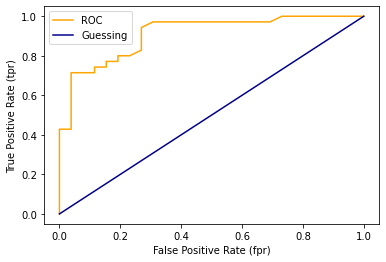

In [113]:
# Create a function for plotting ROC curve 

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate(fpr) 
    and true positive rate(tpr) of a model. 
    """
    
    # Plot roc curve
    plt.plot(fpr, tpr, color="orange", label = "ROC")
    
    # Plot the line with no predicitve power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", label = "Guessing")
    
    #Customize the plot 
    plt.xlabel("False Positive Rate (fpr)")
    plt.ylabel("True Positive Rate (tpr)")
    plt.legend()
    plt.show
    
plot_roc_curve(fpr, tpr)

In [114]:
# Metric which measure the area under the curve

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs_positive)

0.9093406593406593

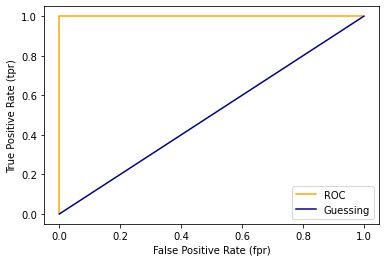

In [115]:
# Plot perfect ROC and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [116]:
roc_auc_score(y_test, y_test)

1.0

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.

In essence, giving you an idea of where the model is getting confused. 

In [117]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[21,  5],
       [ 8, 27]], dtype=int64)

In [118]:
# Visualise confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames=["Actual Labels"],
            colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Labels,,
0,21,5
1,8,27


In [119]:
21 + 5 + 8 + 27 # In confusion matrix the main diagonal is true negative and true positive 


61

In [120]:
len(X_test)

61

In [121]:
# How to install a conda package into the current environment from a jupter notebook

#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

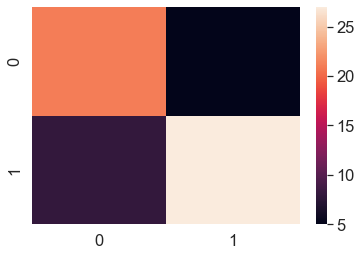

In [122]:
# Make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale = 1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn 
sns.heatmap(conf_mat);

### Creating a confusion matrix using Sci-kit Learn

* To use the new methods of creating a confusion matrix with Sci-kit Learn we will need sklearn version 1.0+

In [123]:
#import sklearn 
#sklearn.__version__

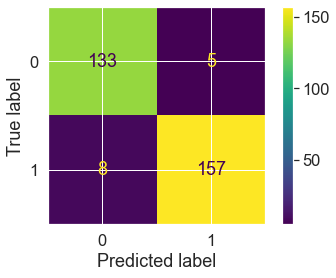

In [124]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator = clf, X=X, y=y)

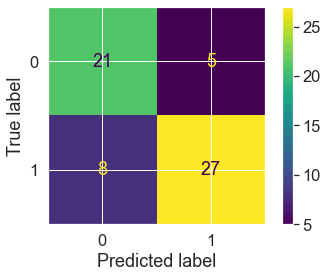

In [125]:
ConfusionMatrixDisplay.from_predictions(y_true = y_test,
                                        y_pred = y_preds);

**Classification Report**

In [126]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        26
           1       0.84      0.77      0.81        35

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61



In [127]:
# Where precision and recall become valuable 
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000) # model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                   disease_preds,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


To summarize classification metrics :
    
* **Acuracy** is a good measure to start with all classes are balanced.
* **Precision** and **recall** become more important when classes are imbalanced.
* If false positive predictions are worse than false negatives, aim for higher precision 
* If false negative predictions are worse than false positives, aim for higher recall 
* **F1-score** is a combination of precision and recall

### 4.2.2 Regression model evaluation matrix 

Model evaluation matrics documentation - https://scikit-learn.org/stable/modules/model_evaluation.html
    
The one we're gonna cover are:

1. R^2 (pronounced r-squared) or coeffecient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)m

In [128]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop("target", axis =1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [129]:
model.score(X_test, y_test)

0.8065734772187598

In [130]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [131]:
y_test.mean()

2.0550030959302275

In [132]:
from sklearn.metrics import r2_score

#Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

In [133]:
y_test_mean[:10]

array([2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031, 2.0550031,
       2.0550031, 2.0550031, 2.0550031, 2.0550031])

In [134]:
r2_score(y_true = y_test,
         y_pred = y_test_mean)

0.0

In [135]:
r2_score(y_true = y_test,
         y_pred = y_test)

1.0

**Mean Absolute Error (MAE)** 

MAE is the average of the absolute differrence between predictions and actual values.

It gives you an idea of how wrong your models predicitons are.

In [136]:
#MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

0.32659871732073664

In [137]:
# Visualising mae 

df = pd.DataFrame(data={"actual values": y_test,
                        "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.543160,0.357160
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.652530,0.065530
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [138]:
# MAE using formulas and differences

np.abs(df["differences"]).mean()

0.32659871732073803

**Mean Squared Error (MSE)**

MSE is the mean of the square of the errors between actual and predicted values. 

In [139]:
# Mean squared error

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_preds)
mse

0.2534678520824551

In [140]:
df["squared_differences"] = np.square(df["differences"])
df.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,0.000284
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [141]:
# Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()

0.25346785208245565

In [142]:
df_large_error = df.copy()
df_large_error.iloc[0]["squared_differences"] = 16

In [143]:
df_large_error.head()

,actual values,predicted values,differences,squared_differences
20046,0.47700,0.493840,0.016840,16.000000
3024,0.45800,0.754940,0.296940,0.088173
15663,5.00001,4.928596,-0.071414,0.005100
20484,2.18600,2.543160,0.357160,0.127563
9814,2.78000,2.331760,-0.448240,0.200919


In [144]:
# Calculate the MSE with larger error 

df_large_error["squared_differences"].mean()

0.2573437523766417

### 4.2.3 Finally using the `scoring` parameter

In [145]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis = 1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators = 100)

In [146]:
np.random.seed(42)

# Cross-Validation Accuracy 

cv_acc = cross_val_score(clf, X, y, cv=5, scoring = None)
# IF scoring = None it considers the classification model scoring model which is accuracy 

cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [147]:
print(f"The Cross Validated Accuracy is : {np.mean(cv_acc) * 100 :.2f}%")

The Cross Validated Accuracy is : 82.48%


In [148]:
# Precision
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring = "precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [149]:
# Cross Validated Precision 
print(f"The Cross Validated Precision is : {np.mean(cv_precision)}")

The Cross Validated Precision is : 0.8329547346025924


In [150]:
# Recall 
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring = "recall")
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [151]:
# Cross Validated Recall
print(f"The Cross Validated recall is : {np.mean(cv_recall)}")

The Cross Validated recall is : 0.8545454545454545


Let's see a `scoring` parameter being used in regression parameter

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

X = housing_df.drop("target", axis =1)
y = housing_df["target"]

model = RandomForestRegressor()

In [153]:
np.random.seed(42)

cv_r2 = cross_val_score(model, X, y, cv=3, scoring = None)
np.mean(cv_r2)

0.6545458023124507

In [154]:
cv_r2

array([0.62156985, 0.72075819, 0.62130937])

In [155]:
# Mean Absolute Error - higher the value, better the model 

cv_mae = cross_val_score(model, X, y, cv = 3, scoring="neg_mean_absolute_error")
cv_mae  

array([-0.52258481, -0.424984  , -0.50667074])

In [156]:
np.mean(cv_mae)

-0.48474651661821716

In [ ]:
# Mean Squared Error 

cv_mse = cross_val_score(model, X, y, cv = 2, scoring = "neg_mean_squared_error")
cv_mse

In [ ]:
np.mean(cv_mse)

### 4.3 Using different evaluation metrics as Scikit learn 

The 3rd way to evaluate scikit machine learning is to use `sklearn.metrics`
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

In [159]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Create X and y
X = heart_disease.drop("target", axis =1)
y = heart_disease["target"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

# Create model 
clf = RandomForestClassifier()

# Fit model 
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)
# Evaluate the model using evaluation functions 
print("Classifier metrics on the test set.")
print(f"Accuracy: {accuracy_score(y_test, y_preds) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")

Classifier metrics on the test set.
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [160]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

np.random.seed(42)

X = housing_df.drop("target", axis =1)
y = housing_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor()
# Fit the model 
model.fit(X_train, y_train)

# Make predicitons
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions

print("Regression metrics on the test set.")
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
print(f"MAE: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set.
R2 score: 0.8065734772187598
MAE: 0.32659871732073664
MAE: 0.2534678520824551


## 5. Improving a model 

First predictions = baseline predictions.
First model = baseline model.

From the data perspective : 
* could we collect more data? (generally, the more data, the better)
* could we improve our data? 

From the model perspective:
* Is there a better model we could use?
* Could we improve the current model?

Hyper parameters vs parameters:

* Parameters = model find these patterns in data
* Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust hyperparameters:
1. By hand 
2. Randomly with RandomSearchCV 
3. Exhaustively with GridSearchCV

In [161]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [162]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tuning hyperparameters by hand 

Let's make 3 sets, training, validiation, and test

In [163]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We're going to try and adjust: 

* `max_depth`
* `max_features`
* `min_sample_leaf`
* `min_sample_split`
* `n_estimators`

In [164]:
def evaluate_preds(y_true, y_preds):
    """
    Performs evaluation comparisons on y_true, labels vs y_pred labels.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    
    metric_dict = {
                    "accuracy": round(accuracy, 2),
                    "precision": round(precision, 2),
                    "recall" : round(recall, 2),
                    "f1": round(f1, 2),
    }
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1: .2f}")
     
    return metric_dict

In [165]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split the data X and y
X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split the dat into train, validation, & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) #70% of data
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) #15% of data

X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier(n_estimators = 10)
clf.fit(X_train, y_train)

# Make baseline predictions 
y_preds = clf.predict(X_valid)

# Evaluate the Classifier on validation set 
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 80.00%
Precision: 0.77
Recall: 0.92
F1 score:  0.84


{'accuracy': 0.8, 'precision': 0.77, 'recall': 0.92, 'f1': 0.84}

In [166]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [167]:
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators = 100)
clf_2.fit(X_train, y_train)


# Make baseline predictions 
y_preds = clf_2.predict(X_valid)

# Evaluate the 2nd Classifier on validation set 
clf_2_metrics = evaluate_preds(y_valid, y_preds)
clf_2_metrics

Acc: 82.22%
Precision: 0.84
Recall: 0.84
F1 score:  0.84


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1': 0.84}

### 5.2. Hyperparameter tuning with RandomizedSearchCV

In [168]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV (estimator = clf,
                             param_distributions = grid,
                             n_iter = 10, # number of models to try
                             cv = 5,
                             verbose = 2)

# Fit the RandomizedSearchCV version of clf 
rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [169]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [170]:
# Make predictions with the best hyperparamters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 
rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc: 81.97%
Precision: 0.77
Recall: 0.86
F1 score:  0.81


### 5.3 Hyperparameter tuning with GridSearchCV

In [171]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [172]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [173]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shuffled.drop("target", axis =1)
y = heart_disease_shuffled["target"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# # Instantiate RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=1)

# # Setup GridSearchCV
# gs_clf = GridSearchCV (estimator = clf,
#                              param_grid = grid_2,
#                              cv = 5,
#                              verbose = 2)

# # Fit the GridSearchCV version of clf 
# gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [174]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [175]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions 
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score:  0.78


Let's compare our differnet models metrics 

<AxesSubplot:>

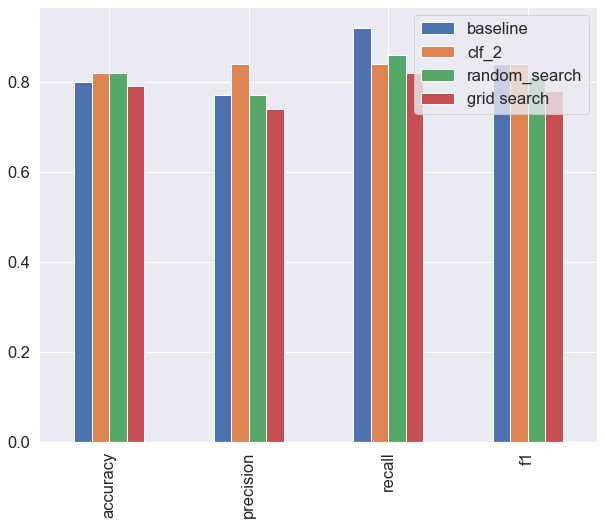

In [176]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                                "clf_2": clf_2_metrics,
                                "random_search": rs_metrics,
                                "grid search": gs_metrics})

                                

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and loading a trained machine learing models

Two ways to save and load machine learning models: 
1. With Python's `pickle` module
2. With the `joblib` module

In [ ]:
**Pickle**

In [178]:
import pickle 

# Save an existing model to file 

pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [179]:
# Load a saved model 

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [180]:
# Make some predicitions 
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score:  0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [181]:
from joblib import dump, load

# save model to file 
dump(gs_clf, filename=("gs_random_forest_model_1.joblib"))

['gs_random_forest_model_1.joblib']

In [183]:
# Import a saved joblib model 
loaded_joblib_model = load(filename="gs_random_forest_model_1.joblib")

In [185]:
# Make evaluate joblib predicitions

joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 0.74
Recall: 0.82
F1 score:  0.78


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

## 7. Putting it all together

In [187]:
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [188]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we want to do (all in one cell):
    
    1. Fill missing data 
    2. Convert data into numbers
    3. Build a model on the data

In [195]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seed 
import numpy as np 
np.random.seed(42)

# import data and drop rows with missing lables 
data = pd.read_csv("data/car-sales-extended-missing-data.csv")
data.dropna(subset = ["Price"], inplace = True)

# Define different features and transformer pipelines
categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy="constant", fill_value = "missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy= "constant", fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps =[
    ("imputer", SimpleImputer(strategy ="mean"))])

# Setup preprocessing steps (fill missing values and converting to numbers)
preprocessor = ColumnTransformer(
                        transformers=[
                            ("cat", categorical_transformer, categorical_features),
                            ("door", door_transformer, door_feature),
                            ("num", numeric_transformer, numeric_features)
                        ])

# Create a preprocessing and modelling pipeline 
model = Pipeline(steps = [("preprocessor", preprocessor),
                           ("model", RandomForestRegressor())])
                 

# Split the data 
X = data.drop("Price", axis =1)
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit and score the model 
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.22188417408787875

It's also possible to use 'GridSearchCV' or 'RandomizedSearchCV' with our Pipeline

In [197]:
# Use GridSearchCV with our regression pipline

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split" : [2,4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)
gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean; total time=   0.3s
[CV] END model__max_depth=None, model__max_features=auto, model__min_sampl

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(fill_value='missing',
                                                                                                        strategy='constant')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Make',
                                                                          'Colour']),
                                                                        ('door',
         

In [198]:
gs_model.score(X_test, y_test)

0.3339554263158365